# **`word2vec` Training Workflow**
In this workflow, we first train `word2vec` models across years using a range of hyperparameters (e.g., vector dimensions and training epochs). The purpose is twofold: (1) to determine whether models from earlier years are reasonably stable, and (2) choose a set of hyperparameters that yield good results across all years. Models are evaluated using "intrinsic" tests of similarity and analogy performance, which we visualize using plots and analyze using linear regression.

Once we've chosen our hyperparameters, we use them to train models for every year from 1900 through 2019.

## **Setup**
### Imports

In [13]:
%load_ext autoreload
%autoreload 2

from ngramkit.ngram_train.word2vec import (
    build_word2vec_models,
    evaluate_word2vec_models,
    plot_evaluation_results,
    run_regression_analysis,
    plot_regression_results,
    transfer_models
)
from ngramkit.ngram_train.word2vec.normalize_and_align_models import normalize_and_align_vectors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Configure
Here we set basic parameters: the corpus path stub, corpus release, language, and ngram size.

In [2]:
db_path_stub = '/scratch/edk202/NLP_corpora/Google_Books/'
release = '20200217'
language = 'eng'
ngram_size = 5

## **Test Model Hyperparameters**
### Train Models
Here we test models from 1900 tp 2015 in 5-year increments, cycling through a range of reasonable hyperparameters. In this workflow, we constrain our grid search as follows:
1. We stick to the Skip-Gram (`skip-gram`) approach. Skip-gram is known to be more efficient than Continuous Bag of Words (`CBOW`) for Google n-gram data.
2. We test vector dimensions (`vector_size`) from 100 to 300. Our vocabulary is probably too small to support the extraction of more than 300 meaningful features.
3. We test training epochs (`epochs`) from 5 to 30. More than 30 epochs risks overfitting.
4. We set the minimum word count (`min_count`) to 1, meaning that no words will be excluded from training. Our whitelist ensures that all vocabulary words appear frequently in every corpus from 1900 to 2015.
5. Weighting (`weight_by`) is set to none. `word2vec` already downweights extremely frequent words.
6. We set a context window (`window`) of 4. This width extracts as much context as possible from 5-grams.

In [3]:
build_word2vec_models(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    years=(1900, 2015),
    year_step=5,
    weight_by=('none',),
    vector_size=(100, 200, 300),
    window=(4,),
    min_count=(1,),
    approach=('skip-gram',),
    epochs=(5, 10, 15, 20, 25, 30),
    max_parallel_models=26,
    workers_per_model=5,
    mode="resume",
    unk_mode="retain",
    use_corpus_file=True,
    cache_corpus=True
);


Scanning for existing models...


Scanning existing models: 100%|██████████| 406/406 [00:06<00:00, 59.85 files/s]

  Valid models found:    406
  Invalid/partial:       0

WORD2VEC MODEL TRAINING
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Start Time: 2025-12-02 18:45:01

Configuration
════════════════════════════════════════════════════════════════════════════════════════════════════
Database:             .../edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/5grams_pivoted.db
Model directory:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
Log directory:        .../edk202/NLP_models/Google_Books/20200217/eng/5gram_files/logs_test/training
Parallel models:      26

Training Parameters
────────────────────────────────────────────────────────────────────────────────────────────────────
Years:                1900–2015 (step=5, 24 years)
Weighting:            ('none',)
Vector size:          (100, 200, 300)
Context window:       (4,)
Minimum word count:   (1,)
Approach:             ('skip-gram',)
Training e

  Created corpus file for year 2015, weight_by=none: /state/partition1/job-88576/w2v_corpus_y2015_wbnone_5rx7l4gx.txt
  Created corpus file for year 1995, weight_by=none: /state/partition1/job-88576/w2v_corpus_y1995_wbnone_swy781qf.txt
  Created corpus file for year 2010, weight_by=none: /state/partition1/job-88576/w2v_corpus_y2010_wbnone_9kum4xon.txt
  Created corpus file for year 2000, weight_by=none: /state/partition1/job-88576/w2v_corpus_y2000_wbnone_en7hx3xq.txt
  Created corpus file for year 2005, weight_by=none: /state/partition1/job-88576/w2v_corpus_y2005_wbnone_bushdeu1.txt



Training Models: 100%|██████████| 26/26 [5:10:15<00:00, 715.99s/ models]   


Training Complete
════════════════════════════════════════════════════════════════════════════════════════════════════
Models trained:       26
Model directory:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━



### Evaluate Models

Here we evaluate the models we've trained using two "intrinsic" tests: (1) a _similarity test_ assessing how well each model predicts human-rated synonymy judgments, and (2) an _analogy test_ assessing how well each model can answer SAT-style analogy questions. Test results are saved to a CSV file.

Similarity performance is the metric of choice for models intended to track semantic relatedness over time. However, we run both tests here to demonstrate the evaluation code and show that different hyperparameters lend themselves to different performance metrics.

In [ ]:
evaluate_word2vec_models(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    save_mode='overwrite',
    run_similarity=True,
    run_analogy=True,
    workers=80
);


WORD2VEC MODEL EVALUATION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Start Time: 2025-12-03 00:05:00

Configuration
════════════════════════════════════════════════════════════════════════════════════════════════════
Model directory:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
Evaluation file:      ...LP_models/Google_Books/20200217/eng/5gram_files/evaluation_results_test.csv
Log directory:        ...dk202/NLP_models/Google_Books/20200217/eng/5gram_files/logs_test/evaluation
Save mode:            overwrite

Evaluation Datasets
────────────────────────────────────────────────────────────────────────────────────────────────────
Similarity dataset:   ...miniforge/lib/python3.11/site-packages/gensim/test/test_data/wordsim353.tsv
Analogy dataset:      ...orge/lib/python3.11/site-packages/gensim/test/test_data/questions-words.txt

Found 432 models to evaluate



Evaluating models:   0%|          | 0/432 [00:00<?, ? models/s]

### Visualize Model Performance
The code below plots the results of the similarity and analogy tests for easy inspection.
#### Similarity Results

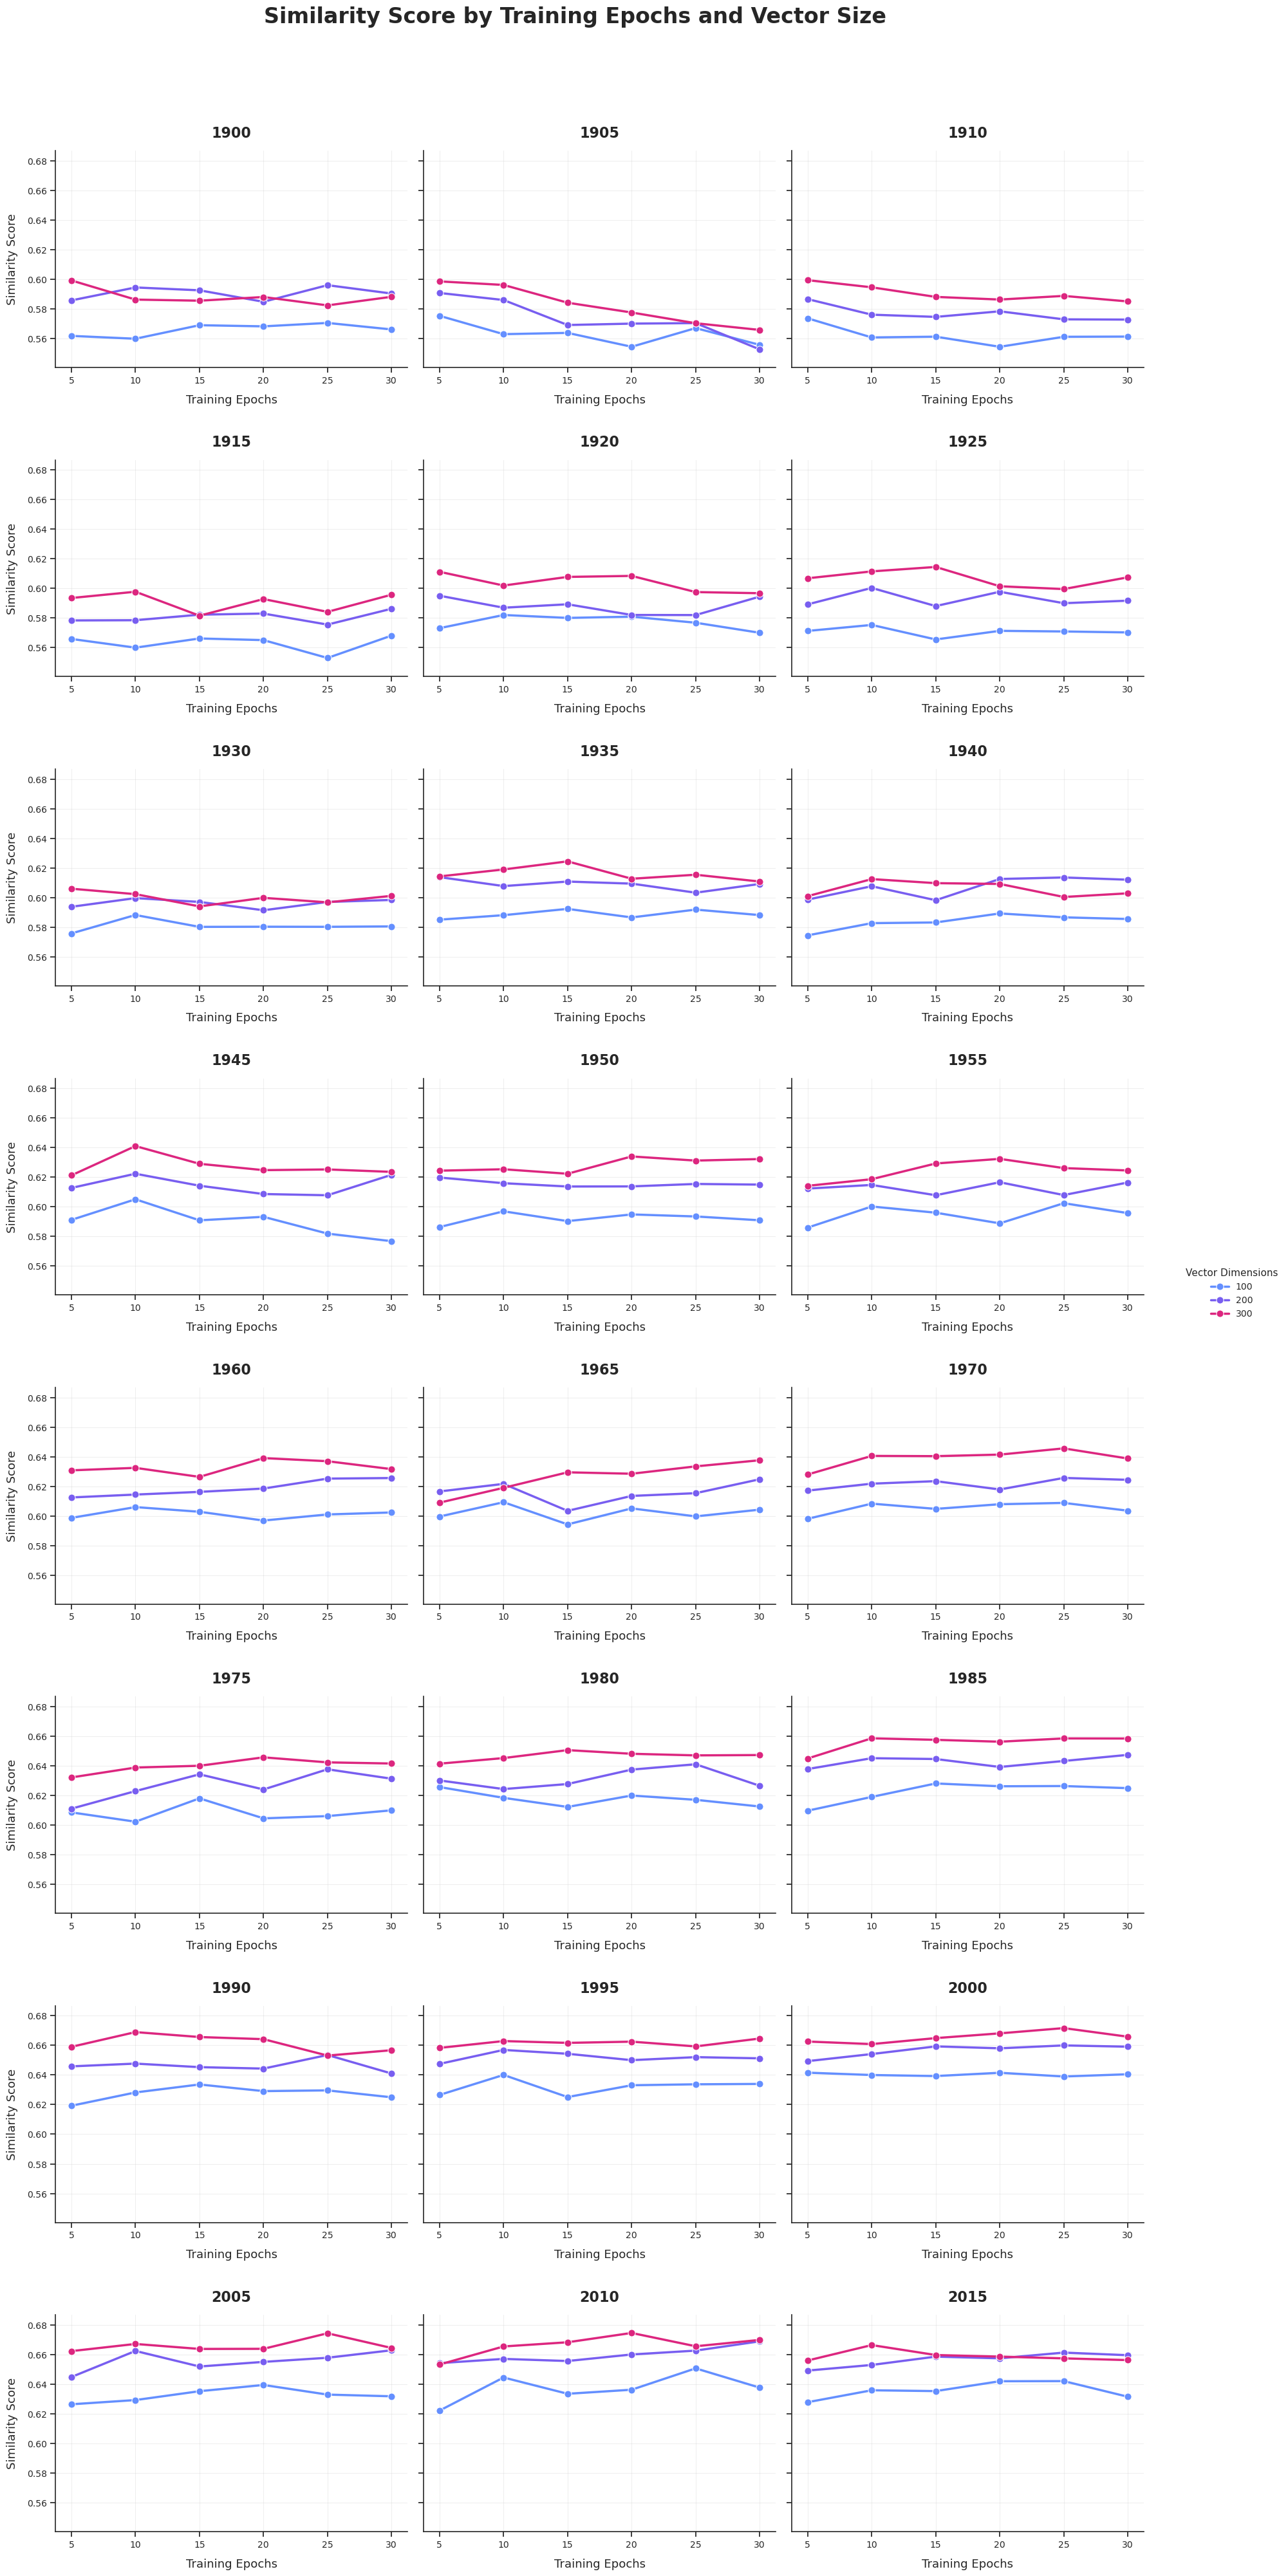

In [3]:
plot_evaluation_results(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    verbose=False,
    metric='similarity_score',
    x_vars=['epochs', 'vector_size'],
    panel_by='year',
    plot_type='line',
    plot_title='Similarity Score by Training Epochs and Vector Size'
)

#### Analogy Results

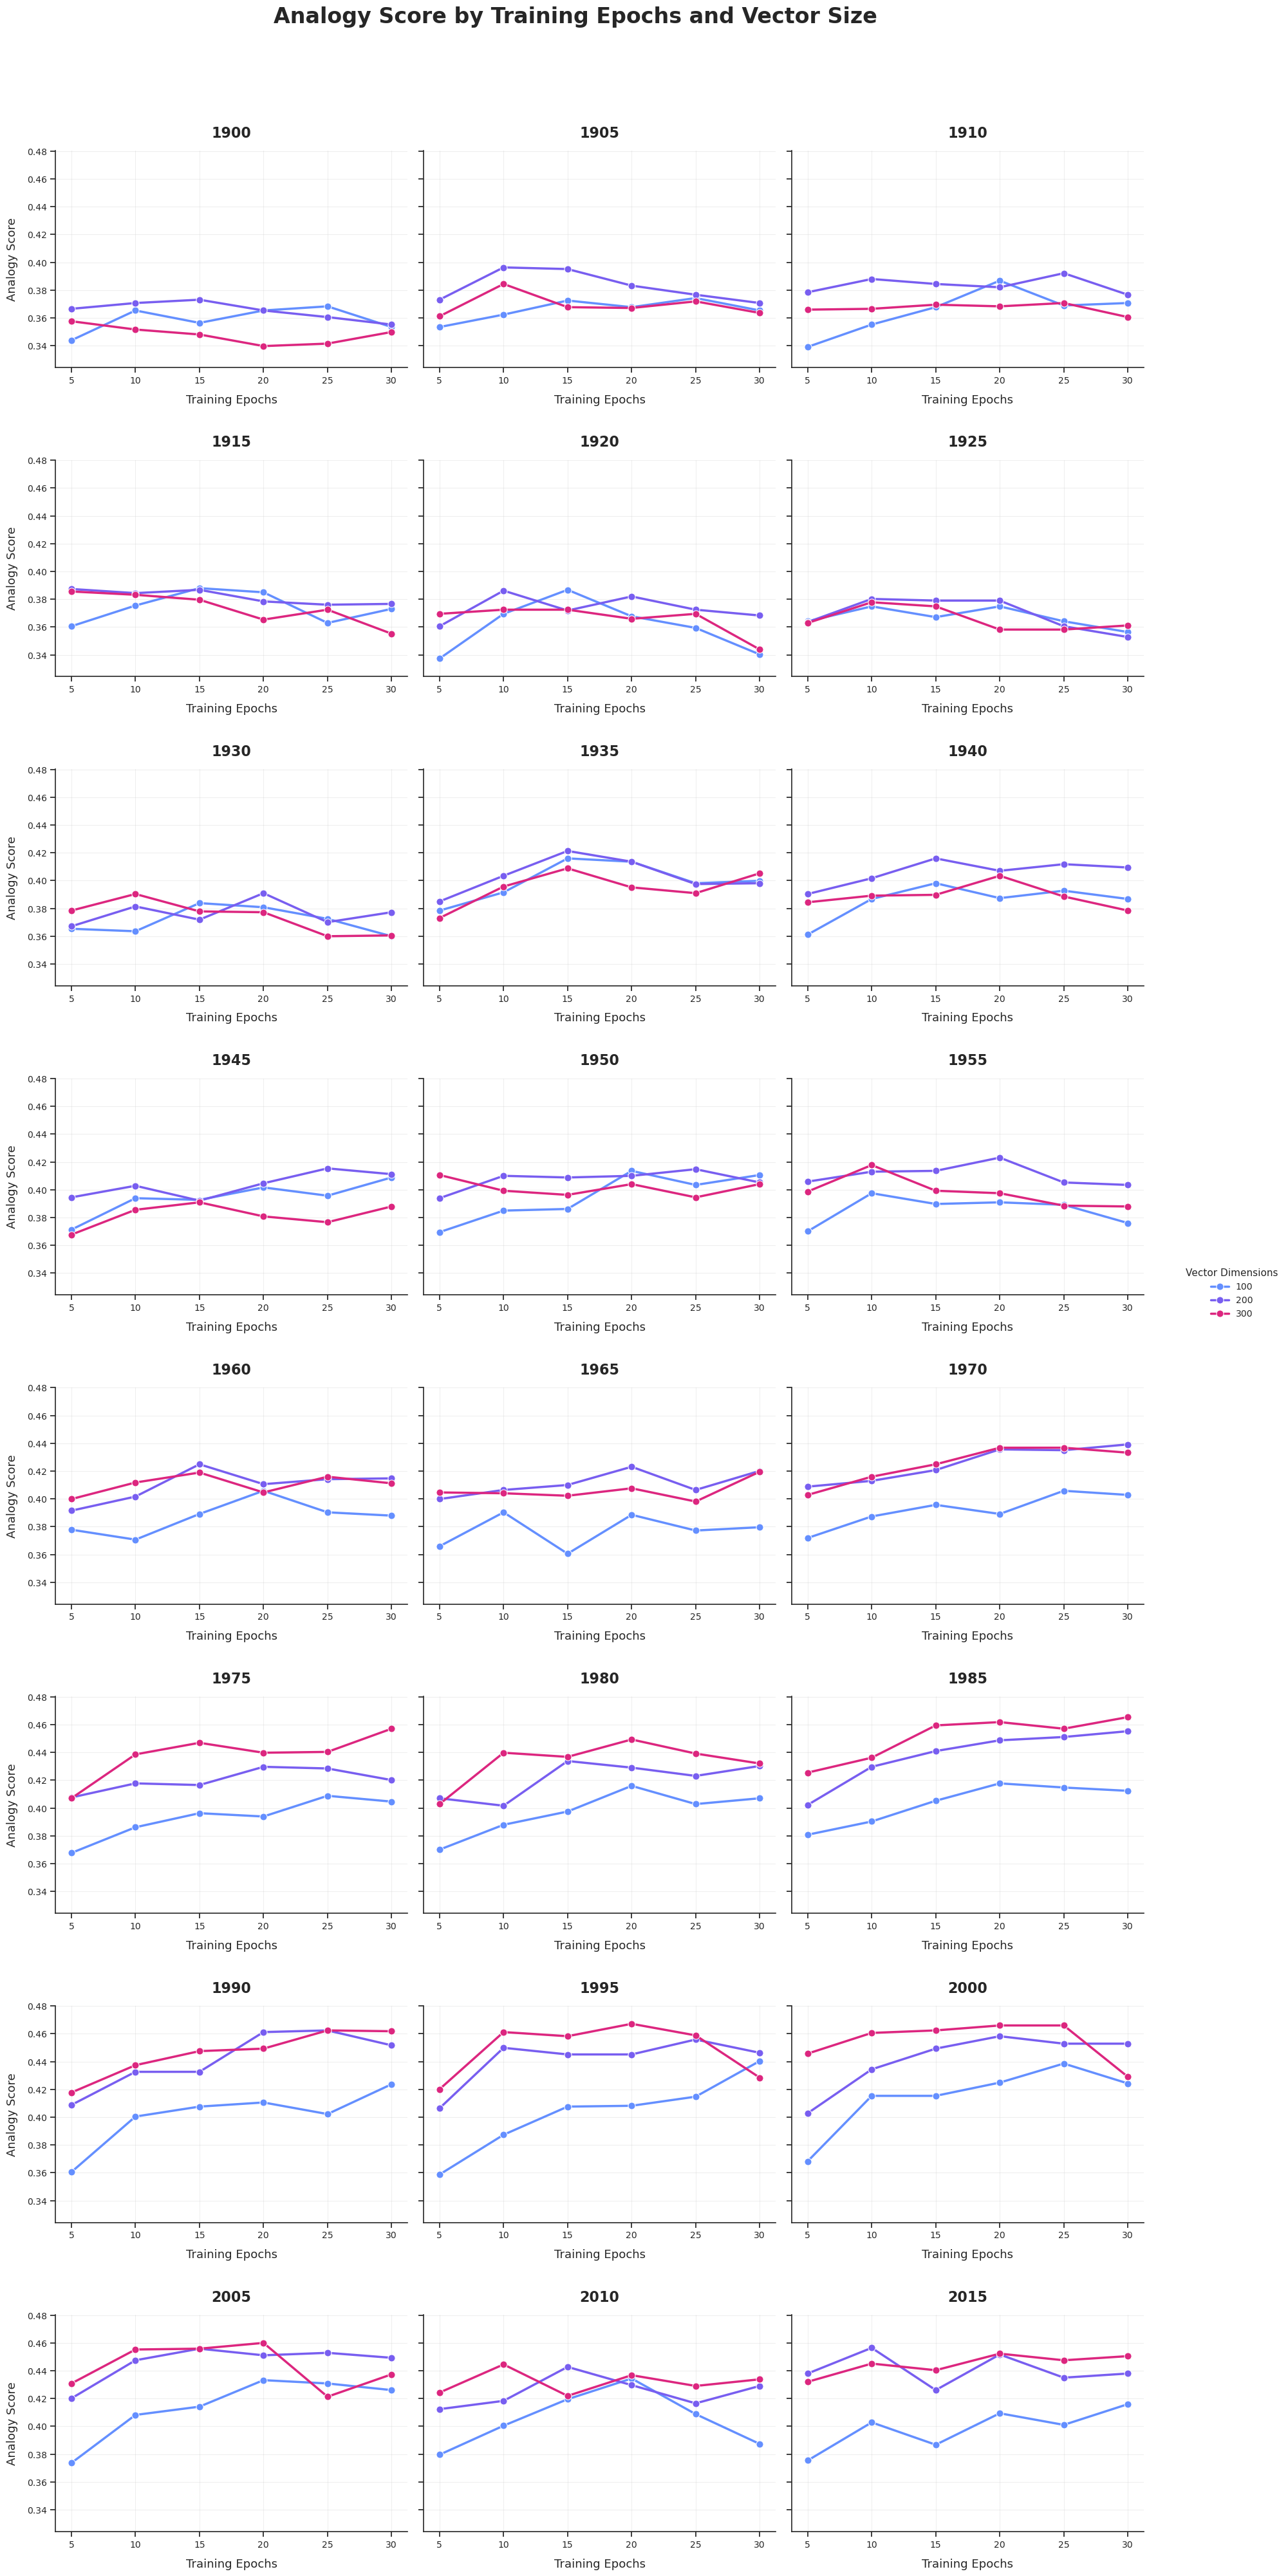

In [4]:
plot_evaluation_results(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    verbose=False,
    metric='analogy_score',
    x_vars=['epochs', 'vector_size'],
    panel_by='year',
    plot_type='line',
    plot_title='Analogy Score by Training Epochs and Vector Size'
)

### Regression Analysis
The code below runs regression analyses on the similarity and analogy results.
#### Predictors of Similarity Performance

Loading data...
Loaded 432 observations
Number of years: 24

Model specification:
  Formula: similarity_score ~ scale(year) + scale(vector_size) + scale(epochs) + scale(year):scale(vector_size) + scale(year):scale(epochs) + scale(vector_size):scale(epochs)
  Random effects: year

Fitting mixed-effects model...
Mixed-effects model failed (Singular matrix). Falling back to OLS regression...
Model converged successfully!

                            OLS Regression Results                            
Dep. Variable:       similarity_score   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1028.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.03e-249
Time:                        06:05:25   Log-Likelihood:                 1500.5
No. Observations:                 432   AIC:                            -2987.
Df Residuals:           

/opt/miniforge/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


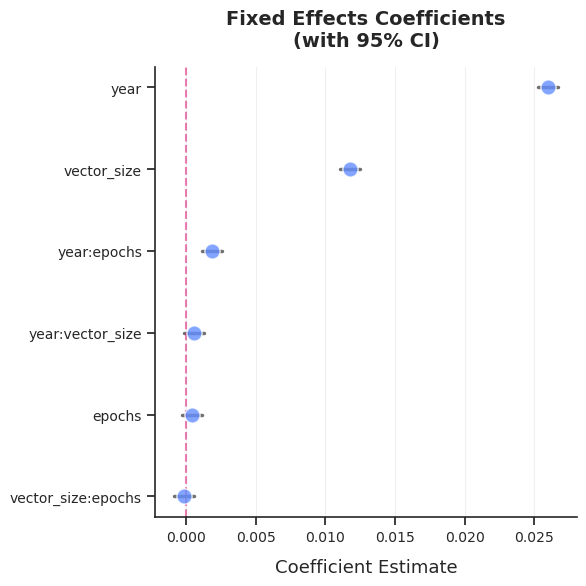

In [10]:
results = run_regression_analysis(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    model_type="auto",
    outcome='similarity_score',
    predictors=['year', 'vector_size', 'epochs'],
    interactions=[('year', 'vector_size'), ('year', 'epochs'), ('vector_size', 'epochs')],
)

plot_regression_results(results)

#### Predictors of Analogy Performance

Loading data...
Loaded 432 observations
Number of years: 24

Model specification:
  Formula: analogy_score ~ scale(year) + scale(vector_size) + scale(epochs) + scale(year):scale(vector_size) + scale(year):scale(epochs) + scale(vector_size):scale(epochs)
  Random effects: year

Fitting mixed-effects model...
Mixed-effects model failed (Singular matrix). Falling back to OLS regression...
Model converged successfully!

                            OLS Regression Results                            
Dep. Variable:          analogy_score   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          1.13e-127
Time:                        06:06:24   Log-Likelihood:                 1206.5
No. Observations:                 432   AIC:                            -2399.
Df Residuals:              

/opt/miniforge/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


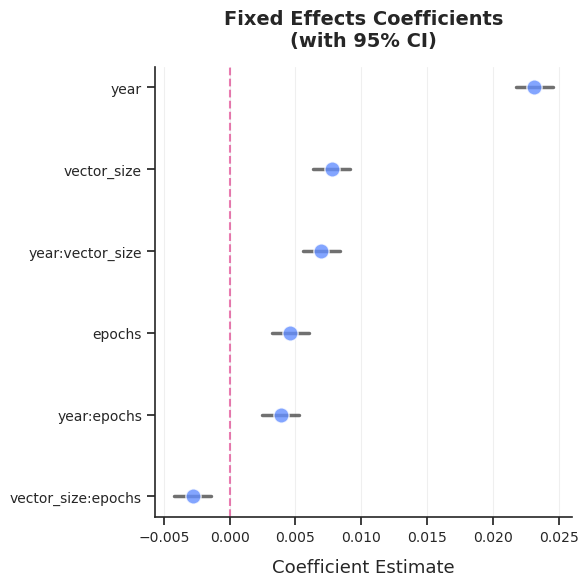

In [11]:
results = run_regression_analysis(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='test',
    model_type="auto",
    outcome='analogy_score',
    predictors=['year', 'vector_size', 'epochs'],
    interactions=[('year', 'vector_size'), ('year', 'epochs'), ('vector_size', 'epochs')],
)

plot_regression_results(results)

## **Transfer or Train Final Models**

We have two options now that the hyperparameter search is complete. If the desired final models are in the search set, we can simply transfer them to a new directory for analysis. Or, if the desired models aren't in the test set, we can train the final models and place them in the analysis directory.

### Transfer Final Models

In [16]:
result = transfer_models(
    ngram_size=ngram_size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    source_suffix='test',
    dest_suffix='final',
    filter_params={'vector_size': 300, 'epochs': 10},
    overwrite=True
)


Removing existing destination directory: /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final

MODEL TRANSFER
Source:      /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_test
Destination: /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final
Filters:     {'vector_size': 300, 'epochs': 10}
Validate:    True



Transferring models: 100%|██████████| 432/432 [00:02<00:00, 202.14 files/s]


TRANSFER COMPLETE
Models found:      24
Transferred:       24
Skipped:           0
Destination:       /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final



### Train Final Models

In [ ]:
build_word2vec_models(
    ngram_size=size,
    repo_release_id=release,
    repo_corpus_id=language,
    db_path_stub=db_path_stub,
    dir_suffix='final',
    years=(1900, 2019),
    year_step=1,
    weight_by=('none',),
    vector_size=(300,),
    window=(4,),
    min_count=(1,),
    approach=('skip-gram',),
    epochs=(10,),
    max_parallel_models=50,
    workers_per_model=2,
    mode="resume",
    unk_mode="retain",
    use_corpus_file=True
);

## **Normalize and Align Models**

Before we can use the models for diachronic analysis, we need to unit-normalize the vectors and align them across years using Procrustes rotation. The `normalize_and_align_vectors` function does this.

In [18]:
ngram_size = 5
proj_dir = f'/scratch/edk202/NLP_models/Google_Books/{release}/{language}'
dir_suffix = 'final'
anchor_year = 2015
workers = 50

normalize_and_align_vectors(
    ngram_size=ngram_size,
    proj_dir=proj_dir,
    dir_suffix=dir_suffix,
    anchor_year=anchor_year,
    workers=workers
)

Saved normalized anchor model to /scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align/w2v_y2015_wbnone_vs300_w004_mc001_sg1_e010.kv


Processing models: 100%|██████████| 23/23 [00:37<00:00,  1.61s/file]

Total runtime: 0:00:38.046260
Processed 24 models. Aligned to anchor year 2015.
